In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from svetlanna import elements
from svetlanna import SimulationParameters

from svetlanna import simulation_parameters as sp
from svetlanna import wavefront as w

In [26]:
torch.set_default_dtype(torch.float64)

D = 0.05
d = 6
lam = torch.linspace(330, 1064., 4) * 1e-6
# lam = 660* 1e-6
length = 8

wave_vector = 2* torch.pi / lam
w0 = 2.

Nx = 1920
Ny = 1080

x_length = torch.linspace(-length, length, Nx)
y_length = torch.linspace(-length, length, Ny)

params = SimulationParameters(
    axes={
        'W': x_length,
        'H': y_length,
        'wavelength': lam
        })
xv, yv = params.meshgrid(x_axis='W', y_axis='H')



In [27]:
# create plane  before the aperture
z = 10
incident_field = w.Wavefront.gaussian_beam(simulation_parameters=params, waist_radius=w0, distance=z)

intensity_source = incident_field.intensity


In [28]:
# create rectangular aperture
rectangular_aperture = elements.RectangularAperture(
    simulation_parameters=params,
    height=d,
    width=D
)

transmission_field = rectangular_aperture.forward(input_field=incident_field)
transmission_field.shape

transmission_intensity = transmission_field.intensity

In [ ]:
fs1 = elements.FreeSpace(simulation_parameters=params, distance=z, method='AS')
output_field = fs1.forward(input_field=transmission_field)

output_intensity = output_field.intensity


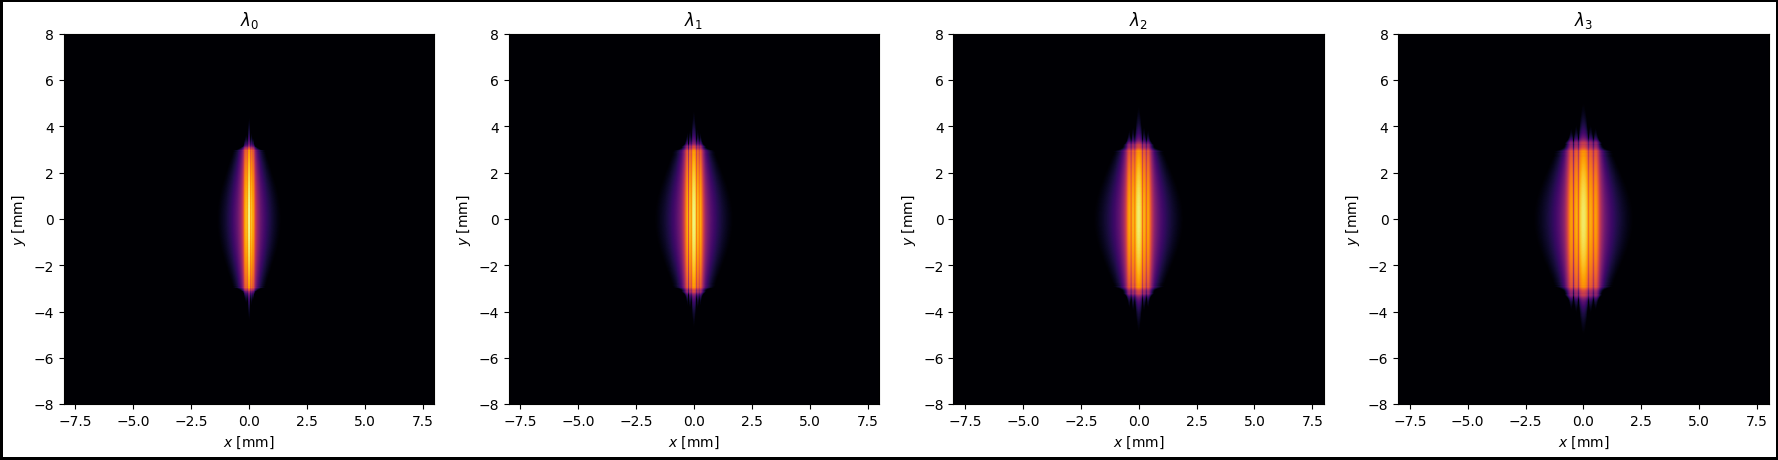

In [30]:
fig, ax = plt.subplots(
    1, 4, figsize=(22, 6), edgecolor='black', linewidth=3, frameon=True
)

for i in range(4):

    ax[i].pcolormesh(xv, yv, output_intensity[i,:,:].detach().numpy(), cmap='inferno', vmin=1e-10, vmax=1, norm='log')
    ax[i].set_aspect('equal')
    ax[i].set_title(rf'$\lambda_{i}$')
    ax[i].set_xlabel('$x$ [mm]')
    ax[i].set_ylabel('$y$ [mm]')
    # fig.colorbar(im1)


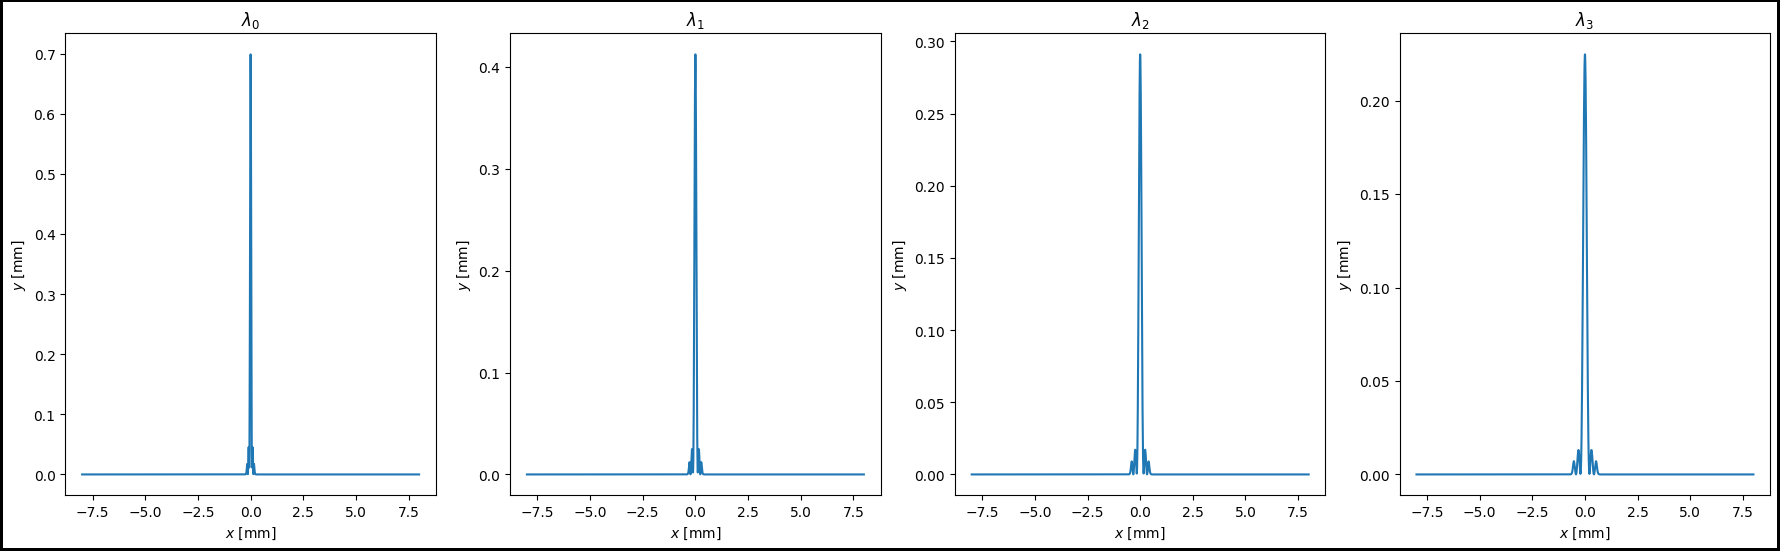

In [31]:
fig, ax = plt.subplots(
    1, 4, figsize=(22, 6), edgecolor='black', linewidth=3, frameon=True
)

for i in range(4):

    ax[i].plot(xv[0], output_intensity[i,520,:].detach().numpy())
    # ax[i].set_aspect('equal')
    ax[i].set_title(rf'$\lambda_{i}$')
    ax[i].set_xlabel('$x$ [mm]')
    ax[i].set_ylabel('$y$ [mm]')
    # fig.colorbar(im1)


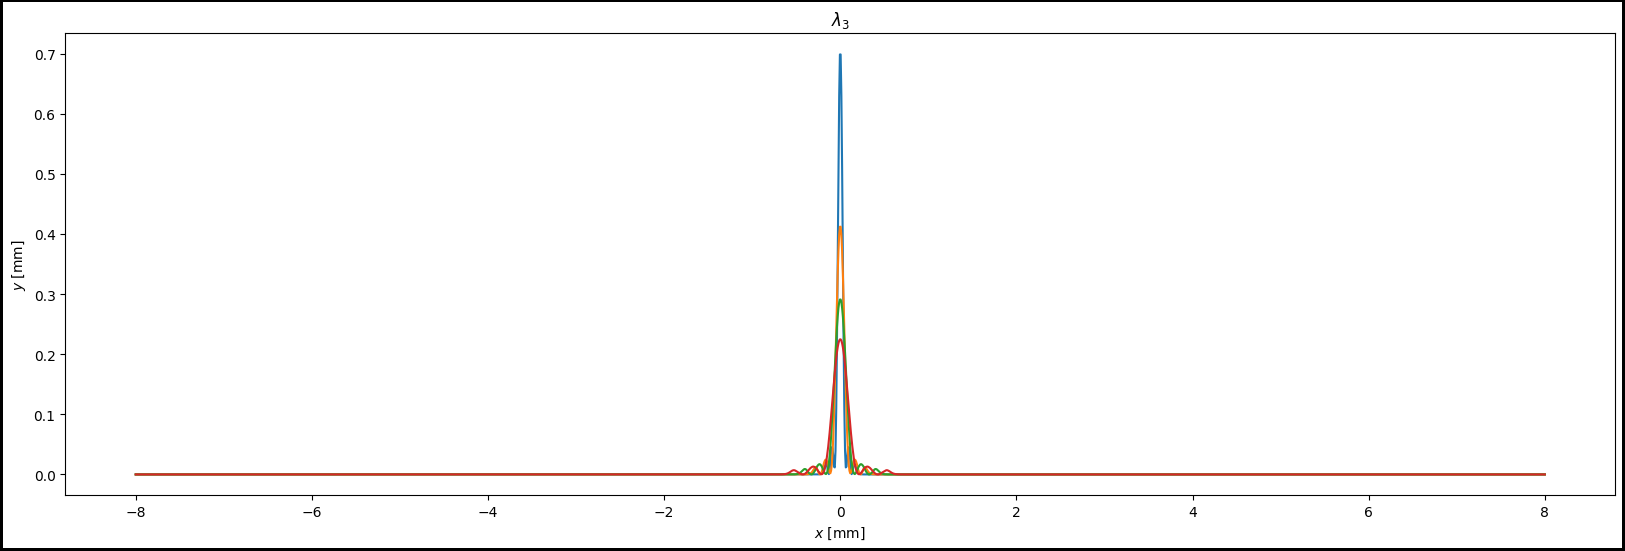

In [33]:
fig, ax = plt.subplots(
figsize=(20, 6), edgecolor='black', linewidth=3, frameon=True
)

for i in range(4):

    ax.plot(xv[0], output_intensity[i,520,:].detach().numpy())
    # ax[i].set_aspect('equal')
    ax.set_title(rf'$\lambda_{i}$')
    ax.set_xlabel('$x$ [mm]')
    ax.set_ylabel('$y$ [mm]')
    # ax.set_yscale('log')
    # fig.colorbar(im1)
